In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2 as cv
import tensorflow as tf

In [3]:
test_dir = r"C:\Users\CSC\Desktop\Waste_classification\Dataset\TEST"
train_dir = r"C:\Users\CSC\Desktop\Waste_classification\Dataset\TRain"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
batch_size = 256
img_height = 224
img_width = 224

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (img_width,img_height),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (img_width,img_height),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")
print(train_generator.class_indices)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
{'O': 0, 'R': 1}


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,(3,3)))  
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,(3,3)))  
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2)) # number of class = 2 Organic and Recycle
model.add(tf.keras.layers.Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


hist = model.fit(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

In [4]:
plt.figure(figsize=[10,7])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

NameError: name 'hist' is not defined

<Figure size 720x504 with 0 Axes>

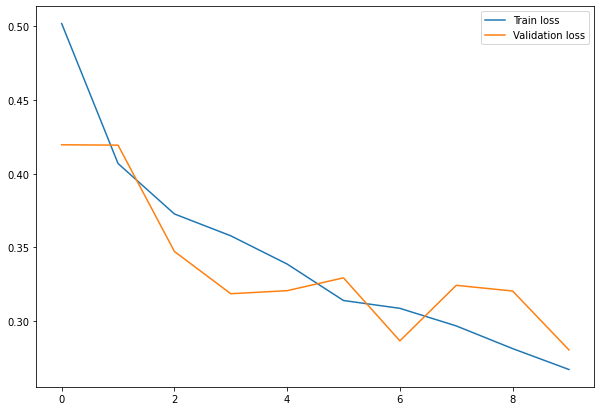

In [15]:
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [16]:
loss,accuracy = model.evaluate_generator(test_generator)
print(f"loss : {loss}")
print(f"accuracy : {accuracy}")
# print(f"precision : {precision}")
# print(f"recall : {recall}")

# f1_score = (2*recall*precision)/(recall+precision)
# print(f"f1 score:{f1_score}")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss : 0.28030213713645935
accuracy : 0.8901711106300354


In [18]:
img = tf.keras.preprocessing.image.load_img('/content/fruits1.jpg', target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255
img = np.expand_dims(img,axis=0)
answer = model.predict(img)
print(answer)

[[0.96431255 0.03460265]]


In [19]:
model.save("Waste_Classification_CNN.h5")